# PS5

MACS 30100 Dr. Evens

Jie Heng

## Problem 1 Multinomial logistic regression and cross validation 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import scipy.interpolate as intpl
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\hengj\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\hengj\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### (a)  Use a multinomial logistic regression model of the following form with the following linear predictor ηj for j = 1,2 (the baseline class is j = 3). Estimate the model on a 75% sample training set using the following command. Report your two sets of estimated coeﬃcients for j = 1 and j = 2. Report your error rates (1 - precision) on the test set using the code below. Which category of cultivar is the model best at predicting? Is the most accurately predicted category the one with the most observations?


In [2]:
data = pd.read_csv('strongdrink.txt', sep=",", header=0)
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data = data[['cultivar', 'alco', 'malic', 'tot_phen', 'color_int']]
data.isnull().sum()

cultivar     0
alco         0
malic        0
tot_phen     0
color_int    0
dtype: int64

In [4]:
X = data[['alco', 'malic', 'tot_phen', 'color_int']]
y = data[['cultivar']]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.25,random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
result1 = MultLogReg.fit(X_train, y_train)
y_pred = MultLogReg.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)

C:\Users\hengj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print(classification_report(y_test, y_pred))
print(MultLogReg.intercept_)
print(MultLogReg.coef_)
# print(confusion)

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44

[-24.01098945  22.8024462    1.20854325]
[[ 1.70040338 -0.26560523  1.22389373  0.02275637]
 [-1.46804432 -0.33305312  0.66401185 -0.92271223]
 [-0.23235907  0.59865838 -1.88790558  0.89995595]]


In [6]:
print('Validation set MSE = ', mean_squared_error(y_test,y_pred))

Validation set MSE =  0.0454545454545


In [7]:
print('j = 1:', '\n b0 =', result1.intercept_[0], '   b1 =', result1.coef_[0][0],
      '\n b2 =', result1.coef_[0][1], '  b3 =', result1.coef_[0][2],
      '    b4 =', result1.coef_[0][3])
print('\n')
print('j = 2:','\n b0 =', result1.intercept_[1], '    b1 =', result1.coef_[1][0],
      '\n b2 =', result1.coef_[1][1], '  b3 =', result1.coef_[1][2],
      '  b4 =', result1.coef_[1][3])

j = 1: 
 b0 = -24.0109894515    b1 = 1.7004033763 
 b2 = -0.265605226518   b3 = 1.2238937289     b4 = 0.0227563746875


j = 2: 
 b0 = 22.8024461982     b1 = -1.46804431964 
 b2 = -0.333053122096   b3 = 0.664011854001   b4 = -0.922712234869


In [8]:
print("Error rates (1 - precision) on the test set for three categories are:\n", 1 - 0.867, ',',1 - 1,',', 1-1)

Error rates (1 - precision) on the test set for three categories are:
 0.133 , 0 , 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 5 columns):
cultivar     176 non-null int64
alco         176 non-null float64
malic        176 non-null float64
tot_phen     176 non-null float64
color_int    176 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


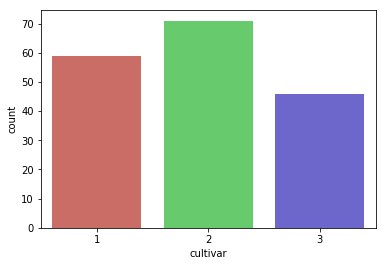

In [9]:
%matplotlib inline
sb.countplot(x = 'cultivar',data = data, palette = 'hls')
data.info()

Among three categories, the third category has the highest F1 score, so the category of cultivar 3 is best at predicting. From the plot above, we could see that the category of cultivar 2 is the one with the most observations, but it is not best at predicting. Thus, the most accurately predicted category is not the one with the most observations.

### (b) Perform a leave-one-out cross validation (LOOCV) with the model from part (a). Report your error rates (1 - precision) for each category? How do your error rates compare to those from part (a)? Report your LOOCV estimate for the test MSE as the average MSE, where yi is the left out observation from each test set.

In [12]:
Xvals = X.values
yvals = y.values
N_loo = Xvals.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvals)
# MSE_vec = np.zeros(N_loo)

176

In [32]:
MSE_vec = np.zeros(N_loo)
y_test_vec = np.zeros(N_loo)
y_pred_vec = np.zeros(N_loo)


for train_index, test_index in loo.split(Xvals):
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_vec[test_index] = y_pred
    y_test_vec[test_index] = y_test
    MSE_vec[test_index] = (y_test - y_pred) ** 2

C:\Users\hengj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
print(classification_report(y_test_vec, y_pred_vec))

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



In [60]:
print('The error rate for class 1 is', 1.00-0.90)
print('The error rate for class 2 is', 1.00-0.91)
print('The error rate for class 3 is', 1.00-0.96)

The error rate for class 1 is 0.09999999999999998
The error rate for class 2 is 0.08999999999999997
The error rate for class 3 is 0.040000000000000036


In [34]:
print('test estimate MSE loocv=', MSE_vec.mean(),', test estimate MSE standard err=', MSE_vec.std())

test estimate MSE loocv= 0.0965909090909 , test estimate MSE standard err= 0.394262505894


Compared with 1a, the error rate for class 1 become smaller but class 2 and class 3 become much larger. It's worse than the result from 1a.

### (c) Perform a k-fold cross validation in which the data are divided into k = 4 groups. Use the following code. Report your error rates (1 - precision) for each category. How do your error rates compare to those from parts (a) and (b)? Report your k-fold estimate for the test MSE as the average MSE.

In [41]:
k=4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(Xvals)
MSE_vec_kf = np.zeros(k)
y_test_k = np.array([])
y_pred_k = np.array([])
k_ind = int(0)

for train_index, test_index in kf.split(Xvals):
    print('k index=', k_ind)
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    y_test_k = np.append(y_test_k, y_test)
    LogReg = LogisticRegression(multi_class='multinomial',solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_k = np.append(y_pred_k, y_pred)
    MSE_vec_kf[k_ind] = mean_squared_error(y_pred, y_test)
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind], '\n')
    k_ind += 1

k index= 0
MSE for test set 0  is 0.227272727273 

k index= 1
MSE for test set 1  is 0.113636363636 

k index= 2
MSE for test set 2  is 0.0454545454545 

k index= 3
MSE for test set 3  is 0.0454545454545 



C:\Users\hengj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf, 'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.107954545455 test estimate MSE standard err= 0.0742994138104


In [39]:
print(classification_report(y_test_k, y_pred_k))

             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176



In [57]:
print('The error rate for class 1 is', 1-0.87)
print('The error rate for class 2 is', 1-0.91)
print('The error rate for class 3 is', 1.00-0.96)

The error rate for class 1 is 0.13
The error rate for class 2 is 0.08999999999999997
The error rate for class 3 is 0.040000000000000036


For the category of cultivar 1, the error rates in a and c are similar. For the category of cultivar 2 and 3, the error rates in part b & c are similar. But generally speaking, the error rates of c become larger compared to a and b.

## Problem 2 Splines and interpolation 

In [42]:
cool = pd.read_csv('CoolIndex.txt', header = None)
cool.columns = ['age', 'coolness']
cool.head()

,age,coolness
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918


In [43]:
print(cool.shape)

(956, 2)


### (a) Create a scatterplot of the data with age on the x-axis and Coolness Index on the y-axis. Label your axes, and give the plot a title.

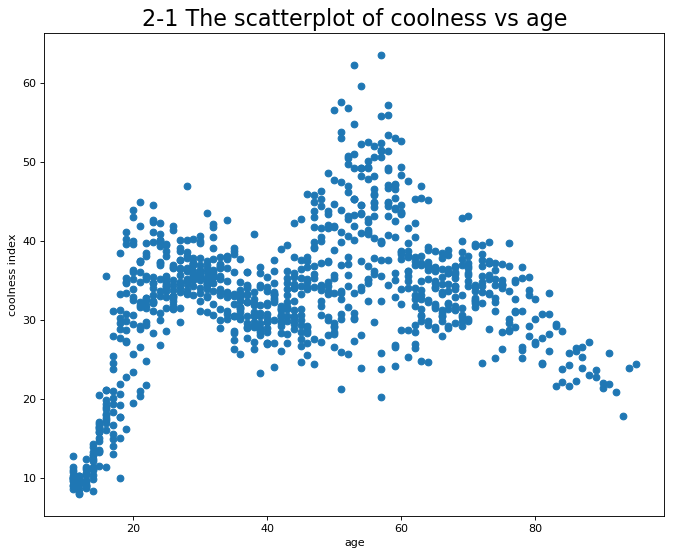

In [44]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(cool.age, cool.coolness)
plt.xlabel('age')
plt.ylabel('coolness index')
plt.title('2-1 The scatterplot of coolness vs age', fontsize=20)
plt.show()

### (b) Use ordinary least squares (OLS) regression to fit a stepwise function to these data. Use 5 bins [11; 22), [22; 40), [40; 59), [59; 77), [77; 95]. Remember that your dummy variables must be integer type (0, 1), not boolean type (True, False). Plot this step function on top of the scatterplot of the data from part (a). Label your axes, include a legend, and give the plot a title. Report your estimated step function values for each bin [beta1; beta2; beta3; beta4; beta5]. What is the predicted coolness of a 73-year old from the stepwise function?

In [45]:
coolness = cool['coolness']
age = cool['age']
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)

X_step = pd.DataFrame(dict(age_bin1=age_bin1, age_bin2=age_bin2,
                           age_bin3=age_bin3, age_bin4=age_bin4,
                           age_bin5=age_bin5))
X_step.describe()

,age_bin1,age_bin2,age_bin3,age_bin4,age_bin5
count,956.000000,956.000000,956.000000,956.000000,956.000000
mean,0.162134,0.276151,0.285565,0.217573,0.057531
std,0.368767,0.447326,0.451919,0.412812,0.232977
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
reg2 = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg2_results = reg2.fit()
print(reg2_results.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        07:50:11   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

Text(0,0.5,'coolness')

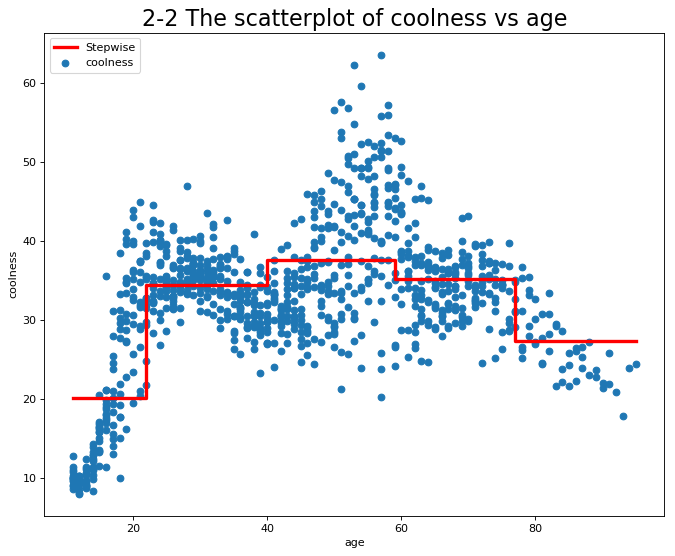

In [47]:
age_step = np.array([11, 22, 40, 59, 77, 95])
cool_step = np.append(reg2_results.params[0], reg2_results.params)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(age, coolness)
plt.step(age_step, cool_step, label='Stepwise', c='r', linewidth=3)
plt.legend(loc='upper left')
plt.title('2-2 The scatterplot of coolness vs age', fontsize = 20)
plt.xlabel('age')
plt.ylabel("coolness")

Report your estimated step function values for each bin [beta1; beta2; beta3; beta4; beta5]. What is the predicted coolness of a 73-year old from the stepwise function?

In [48]:
b1, b2, b3, b4, b5 = reg2_results.params
print('The estimated step function values for each bin are:\n beta1 = ', b1, '\n beta2 = ', b2, '\n beta3 = ', b3, \
      '\n beta4 = ',b4, '\n beta5 = ', b5)
print('Predicted Coolness of 73-year old is', reg2_results.params[3])

The estimated step function values for each bin are:
 beta1 =  20.1024572521 
 beta2 =  34.4757880776 
 beta3 =  37.6351054924 
 beta4 =  35.2254000402 
 beta5 =  27.3481669528
Predicted Coolness of 73-year old is 35.2254000402


### (c) Fit a linear spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 1 (linear) and the knots equal to t =[22,40,59,77]. Plot your continuous linear spline against a scatterplot of the data from part (a) and the estimated step function from part (b). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the linear spline?

In [49]:
knots =[22,40,59,77]
spl = intpl.LSQUnivariateSpline(age.values, coolness.values, knots, k=1)
age_vec = np.linspace(age.values.min(), age.values.max(), 1000)

Text(0,0.5,'Coolness Index')

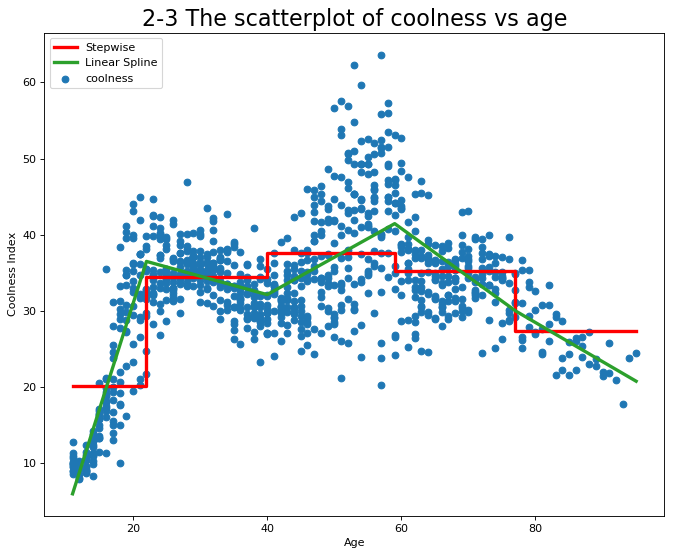

In [50]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(age, coolness)
plt.step(age_step, cool_step, label='Stepwise', c='r', linewidth=3)
plt.plot(age_vec, spl(age_vec), label='Linear Spline', c='C2', linewidth=3)
plt.legend(loc='upper left')
plt.title('2-3 The scatterplot of coolness vs age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

In [51]:
print('Predicted Coolness of 73-year old is', spl(73))

Predicted Coolness of 73-year old is 32.536832389143306


### (d) Fit a cubic spline (continuous) to the data over the 5 age bins from part (b). Use the scipy.interpolate.LQUnivariateSpline function with k = 3 (cubic) and the knots equal to t =[22,40,59,77]. Plot your continuous cubic spline against a scatterplot of the data from part (a) and the estimated step function from part (b), and the linear spline from part (c). Label your axes, include a legend, and give the plot a title. What is the predicted coolness of a 73-year old from the cubic spline?

In [52]:
spl_cube = intpl.LSQUnivariateSpline(age.values, coolness.values, knots, k=3)

Text(0,0.5,'Coolness Index')

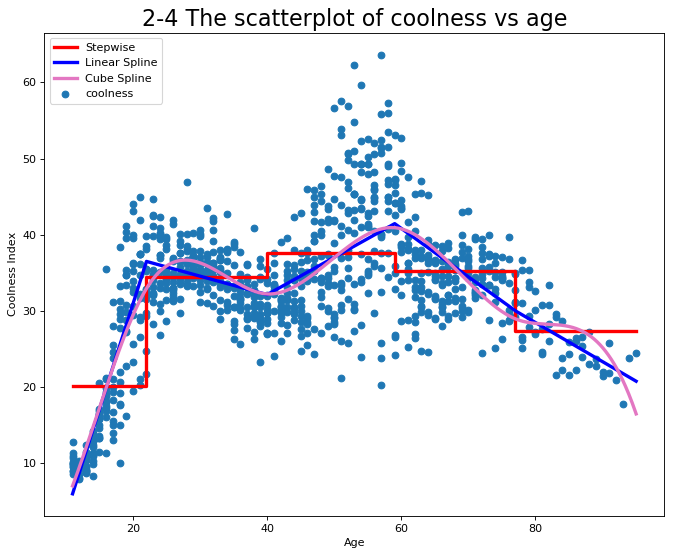

In [53]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(age, coolness)
plt.step(age_step, cool_step, label='Stepwise', c='r', linewidth=3)
plt.plot(age_vec, spl(age_vec), label='Linear Spline', c='b', linewidth=3)
plt.plot(age_vec, spl_cube(age_vec), label='Cube Spline', c='C6', linewidth=3)
plt.legend(loc='upper left')
plt.title('2-4 The scatterplot of coolness vs age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel("Coolness Index")

In [ ]:
print('Predicted Coolness of 73-year old is', spl_cube(73))